In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve, f1_score, balanced_accuracy_score, accuracy_score
from  sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import nltk

In [2]:
def return_no_words(x):
    x = nltk.tokenize.word_tokenize(x)
    return len(x)

In [3]:
def report_results(results_path):
    results = pd.read_csv(results_path)
    # 1 prediction distribution of aggression
    # 0 negative prediction distribution of aggression
    plt.hist([results["y_predict_prob_1"],results["y_predict_prob_0"]])
    plt.ylim(0, 1000)
    plt.xlim(0,1,0.1)

    # predict.prob scores
    fpr, tpr, thrshold = roc_curve(results["y_true_bool"], results["y_predict_prob_1"])
    roc_auc = auc(results["y_true_bool"], results["y_predict_prob_1"])
    print("AUC score", roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    # predict scores
    fpr, tpr, thrshold = roc_curve(results["y_true_binary"], results["y_prediction"])
    roc_auc = auc(results["y_true_binary"], results["y_prediction"])
    print("AUC score", roc_auc)
    # Confusion Matrix
    tn, fp, fn, tp = cm(y_true=results["y_true_binary"], y_pred=results["y_prediction"]).ravel()
    print("CM", tn, fp, fn, tp)
    F1_score = f1_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("F1-score", F1_score)
    #imbalanced accuracy score - NOT TO Trust
    imbalanced_accuracy_score = accuracy_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("imbalanced_accuracy_score", imbalanced_accuracy_score)

In [4]:
def dataset_features_analysis(data, no_features_to_return=10):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.pipeline import Pipeline
    pipe = Pipeline([('count',  CountVectorizer(ngram_range=(1,2), analyzer='word', max_features=10000)),
                         ('tfid',TfidfTransformer(norm='l2', sublinear_tf=True))]).fit(data)
    data_features = pipe.transform(data)
    print("Features mean", data_features.mean())
    sum_words = data_features.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in pipe['count'].vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    print("Most occuring features", words_freq[:no_features_to_return])
    return words_freq

 # Twitter racism linear word oh

AUC score 0.9621084408060506


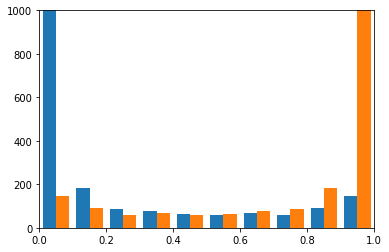

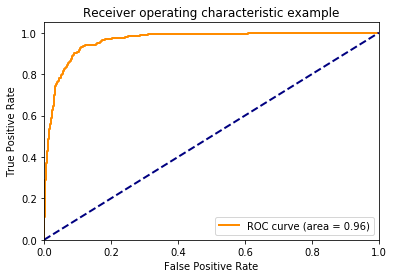

AUC score 0.8328189237437593
CM 2798 89 146 335
F1-score 0.7403314917127072
imbalanced_accuracy_score 0.9302256532066508


In [5]:
 report_results("linear_word_oh_Twitter_racism_prediction_results.csv")

# Twitter racism linear char oh

AUC score 0.9525022316550547


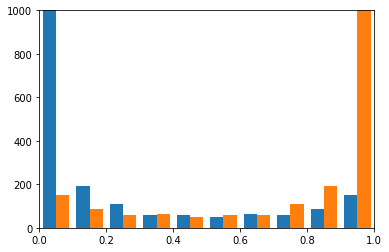

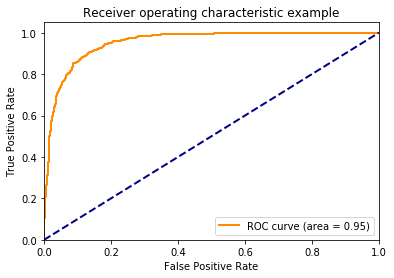

AUC score 0.8128839650491334
CM 2803 100 158 307
F1-score 0.7041284403669724
imbalanced_accuracy_score 0.9233966745843231


In [6]:
 report_results("linear_char_oh_Twitter_racism_prediction_results.csv")

# Twitter racism mlp word oh

AUC score 0.8313842212342702


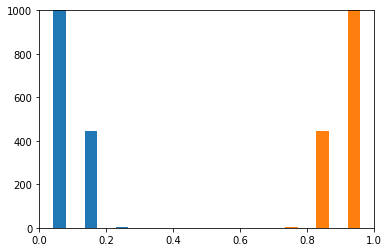

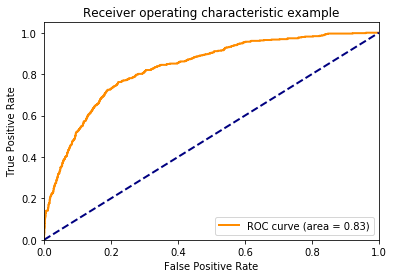

AUC score 0.5
CM 2885 0 483 0
F1-score 0.0
imbalanced_accuracy_score 0.8565914489311164


In [7]:
 report_results("mlp_word_oh_Twitter_racism_prediction_results.csv")

# Twitter racism mlp char oh

AUC score 0.9004803048342168


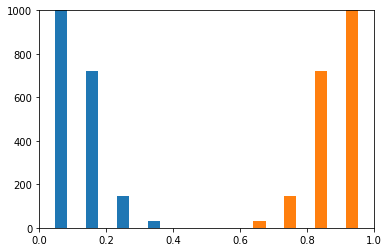

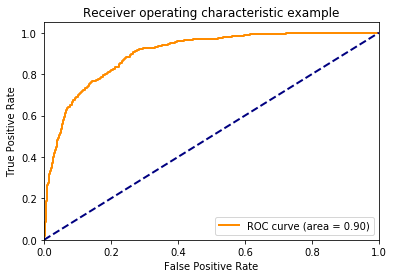

AUC score 0.5
CM 2872 0 496 0
F1-score 0.0
imbalanced_accuracy_score 0.8527315914489311


In [8]:
 report_results("mlp_char_oh_Twitter_racism_prediction_results.csv")

# lstm twitter-racism word

AUC score 0.9558440891003332


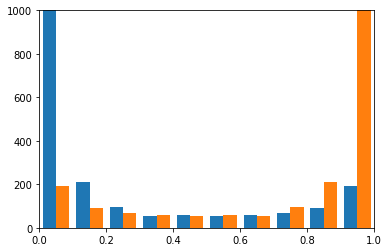

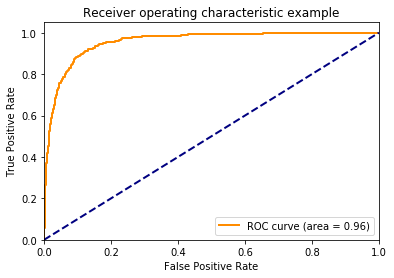

AUC score 0.8445633819361847
CM 2774 124 126 344
F1-score 0.7334754797441364
imbalanced_accuracy_score 0.9257719714964371


In [9]:
 report_results("lstm_word_oh_Twitter_racism_prediction_results.csv")

# lstm twitter racism char

AUC score 0.7231926526366531


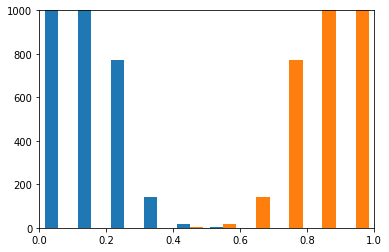

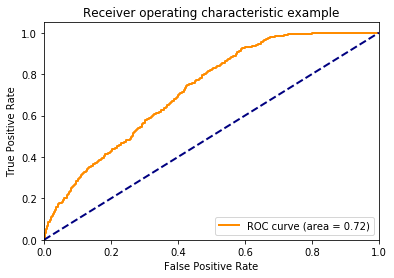

AUC score 0.49965600275197797
CM 2905 2 461 0
F1-score 0.0
imbalanced_accuracy_score 0.8625296912114014


In [10]:
 report_results("lstm_char_oh_Twitter_racism_prediction_results.csv")

# conv_lstm twitter-racism word

AUC score 0.9524542855755749


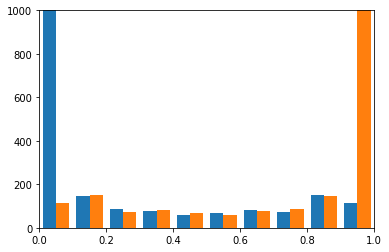

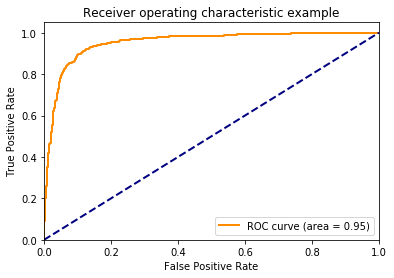

AUC score 0.8512499892907017
CM 2754 128 123 363
F1-score 0.7430910951893551
imbalanced_accuracy_score 0.9254750593824228


In [11]:
 report_results("conv_lstm_word_oh_Twitter_racism_prediction_results.csv")

# conv_lstm twitter_racism char

AUC score 0.9382401012621544


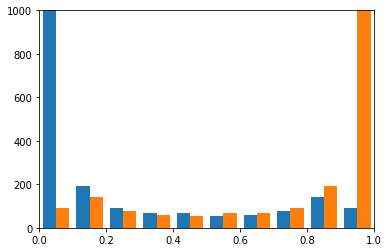

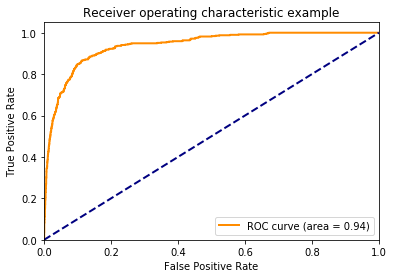

AUC score 0.8050270238402194
CM 2769 110 172 317
F1-score 0.6921397379912663
imbalanced_accuracy_score 0.916270783847981


In [12]:
 report_results("conv_lstm_char_oh_Twitter_racism_prediction_results.csv")

In [13]:
twitter_racis_data = pd.read_csv("../Twitter_racism_parsed_dataset.csv")

In [14]:
twitter_racis_data = twitter_racis_data.dropna()

In [15]:
len(twitter_racis_data)

13471

In [16]:
len(twitter_racis_data[twitter_racis_data["oh_label"] == 1])

1970

In [17]:
len(twitter_racis_data[twitter_racis_data["oh_label"] == 0])

11501

In [45]:
len(twitter_racis_data[twitter_racis_data["oh_label"] == 1])/len(twitter_racis_data)

0.14624007126419716

In [10]:
#avergae number of words per post
twitter_racis_data["No words"] = twitter_racis_data["Text"].apply(lambda x : return_no_words(x))

In [11]:
np.mean(twitter_racis_data["No words"] )

19.543092569222775

In [13]:
np.std(twitter_racis_data["No words"] )

7.789434049546294

In [14]:
np.var(twitter_racis_data["No words"] )

60.675282812231174

(0, 50)

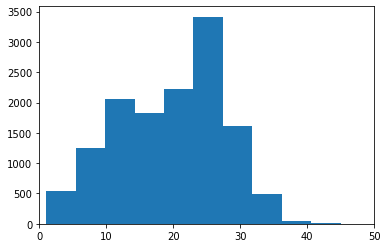

In [17]:
plt.hist(twitter_racis_data["No words"])
plt.xlim(0,50)

In [38]:
df_twitter = dataset_features_analysis(twitter_racis_data["Text"],1000)

Features mean 0.00037564587272305287
Most occuring features [('mkr', 457.2100201846605), ('the', 423.56006169827936), ('co', 367.58435374982554), ('http', 358.8608988003978), ('http co', 348.3702153398643), ('to', 333.27332404057364), ('and', 305.6492533674964), ('is', 295.83037256146355), ('of', 277.0737757372346), ('you', 262.0590364462693), ('rt', 258.2391938262898), ('that', 257.8258291671206), ('it', 247.71163979691175), ('in', 223.87968243293517), ('are', 207.68767370957102), ('for', 181.16490736530267), ('not', 170.2370581082674), ('this', 163.75745188745915), ('they', 158.19945170621796), ('on', 153.66330317145474), ('have', 135.62024920516797), ('be', 133.0394811873214), ('with', 128.70091618622183), ('islam', 123.26210676016404), ('no', 121.1927761416811), ('kat', 120.35863330368032), ('so', 119.9934703540938), ('but', 119.13058570985442), ('my', 116.62247849713917), ('what', 116.5557553078896), ('like', 113.76785430838082), ('was', 112.81405954218093), ('can', 112.4303407330

In [39]:
words = []
numbers = []
for i in df_twitter:
    words.append(i[0])
    numbers.append(i[1])
pd.DataFrame({"twitter_features": words, "twitter_featurs_No": numbers}).to_csv("twitter_features.csv")